<p align="right">
    <img src="Zewail-City.png">
</p>


---

# Machine Learning Lab #7


In [1]:
# import Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

## EDA

### Load

In [2]:
# Load Data
df = pd.read_csv("housing_5000.csv")
df.head()

,Size_m2,Bedrooms,Bathrooms,Distance_km,Age_years,HasGarage,NearbySchools,Floor,Price_USD
0,168.58,3,3,5.44,116.5,0,2,13,233428.52
1,381.76,7,4,27.27,94.4,0,2,1,450813.25
2,300.84,3,2,33.73,65.1,1,3,12,421298.37
3,251.50,6,4,9.29,114.8,1,1,9,320042.87
4,87.73,4,3,34.68,18.5,0,1,4,188230.93


### Initial Data Overview

In [3]:
# Data head
df.head()

,Size_m2,Bedrooms,Bathrooms,Distance_km,Age_years,HasGarage,NearbySchools,Floor,Price_USD
0,168.58,3,3,5.44,116.5,0,2,13,233428.52
1,381.76,7,4,27.27,94.4,0,2,1,450813.25
2,300.84,3,2,33.73,65.1,1,3,12,421298.37
3,251.50,6,4,9.29,114.8,1,1,9,320042.87
4,87.73,4,3,34.68,18.5,0,1,4,188230.93


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Size_m2        5000 non-null   float64
 1   Bedrooms       5000 non-null   int64  
 2   Bathrooms      5000 non-null   int64  
 3   Distance_km    5000 non-null   float64
 4   Age_years      5000 non-null   float64
 5   HasGarage      5000 non-null   int64  
 6   NearbySchools  5000 non-null   int64  
 7   Floor          5000 non-null   int64  
 8   Price_USD      5000 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 351.7 KB


In [5]:
# Null counts
print("null counts:")
df.isnull().sum()

null counts:


Size_m2          0
Bedrooms         0
Bathrooms        0
Distance_km      0
Age_years        0
HasGarage        0
NearbySchools    0
Floor            0
Price_USD        0
dtype: int64

In [6]:
# Data statistical summary
df.describe(include="all")

,Size_m2,Bedrooms,Bathrooms,Distance_km,Age_years,HasGarage,NearbySchools,Floor,Price_USD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,213.827794,3.948600,2.891000,20.061324,59.786920,0.59880,2.006000,7.540200,299793.415318
std,107.164466,2.017417,1.236052,11.468306,34.261356,0.49019,1.437072,4.001598,111578.588353
min,30.000000,1.000000,1.000000,0.200000,0.000000,0.00000,0.000000,1.000000,10000.000000
25%,120.232500,2.000000,2.000000,10.390000,30.100000,0.00000,1.000000,4.000000,214742.782500
50%,215.000000,4.000000,3.000000,20.045000,59.600000,1.00000,2.000000,8.000000,300146.255000
75%,306.800000,6.000000,4.000000,29.890000,88.500000,1.00000,3.000000,11.000000,385114.805000
max,399.900000,7.000000,4.000000,39.990000,120.000000,1.00000,10.000000,14.000000,624789.600000


---

### Outliers Detection and Visualization

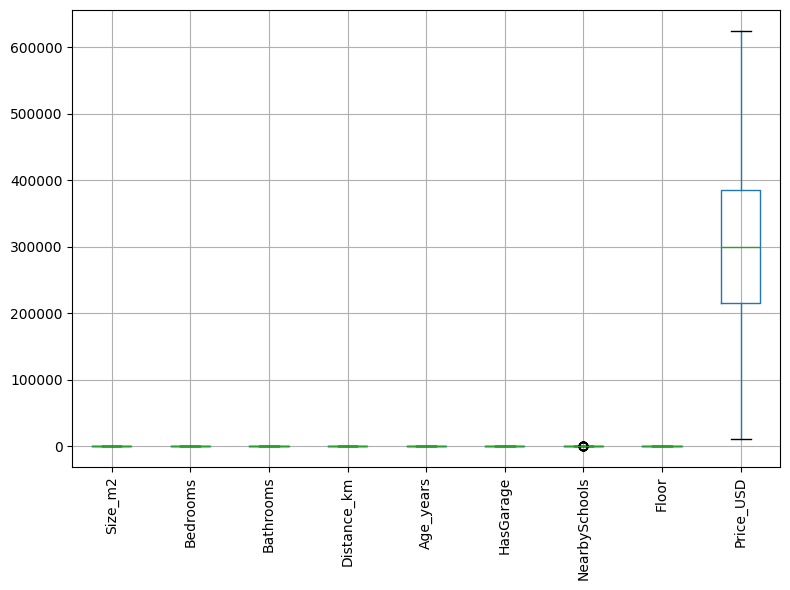

In [7]:
# Boxplot
df.boxplot(rot=90, figsize=(8, 6))
plt.tight_layout()

# Display
plt.show()

---

### Split Dataset

In [8]:
# Supposing final features and target
X = df.drop(columns=["Price_USD"]) # features
y = df["Price_USD"] # target

In [9]:
# First split: Train + Temp (validation + test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (4000, 8)
y_train: (4000,)
X_test: (1000, 8)
y_test: (1000,)


### Standardization

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

---

## ML

In [12]:
# models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel="rbf", C=1000, gamma="scale")
}

In [13]:
# Training 
for model in models.values():
    model.fit(X_train_scaled, y_train)

---

### Models Comparison

In [14]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [15]:
results = {}

for name, model in models.items():
    results[name] = evaluate(model, X_test_scaled, y_test)

results_df = pd.DataFrame(results).T
results_df

,R2,MAE,MSE,RMSE
Linear Regression,0.948900,19904.124908,6.150531e+08,24800.263852
KNN,0.896136,28112.030952,1.250140e+09,35357.312227
SVR,0.853056,32073.178227,1.768654e+09,42055.366999


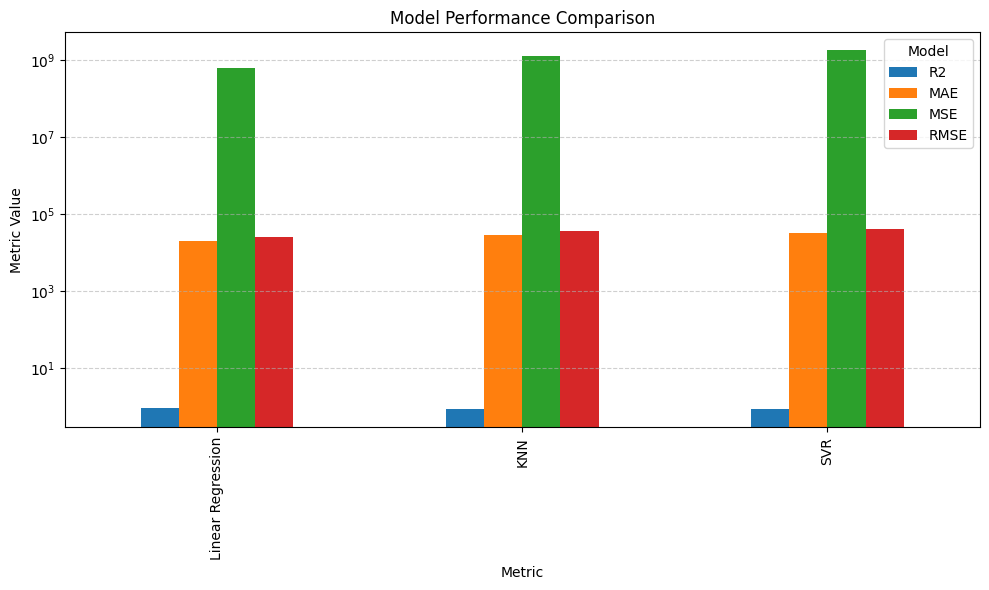

In [16]:
results_df.plot(kind="bar", figsize=(10,6), logy=True)

plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Metric")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

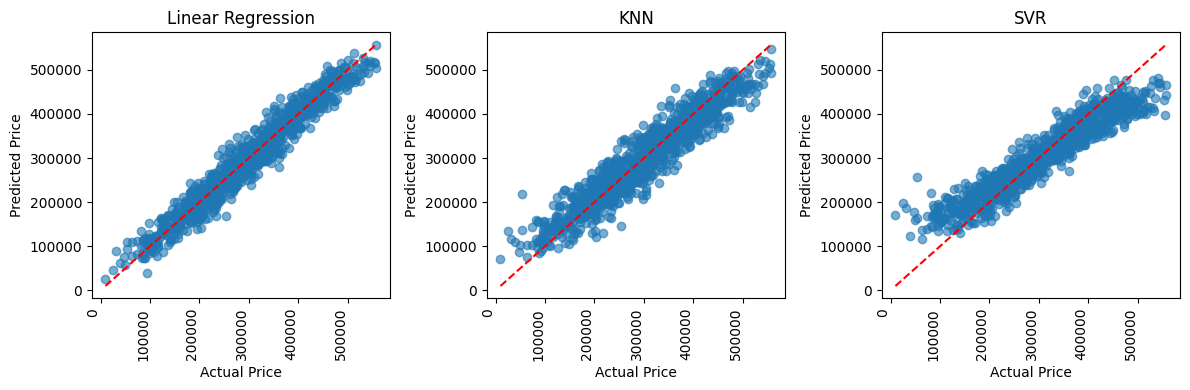

In [17]:
plt.figure(figsize=(12,4))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

---